## Decorators : Decorators extend the functionality without making changes to the original functions
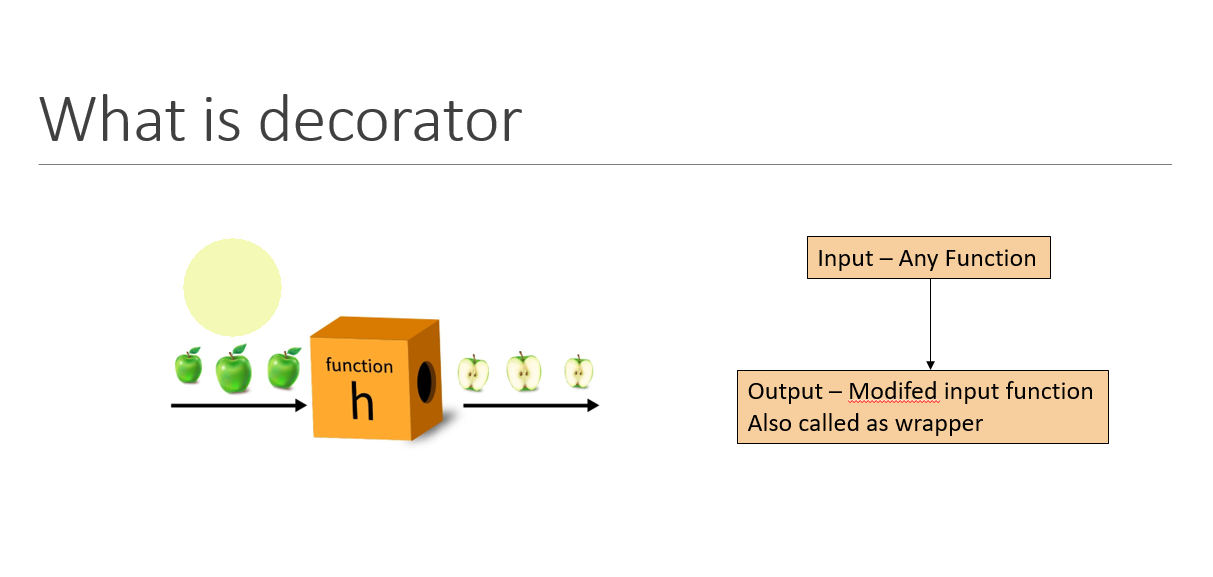

In [8]:
def multiply(x:int,y:int):
    c = x*y
    return c

In [9]:
multiply(45,2)

90

In [10]:
help(multiply)

Help on function multiply in module __main__:

multiply(x: int, y: int)



In [11]:
multiply('A',3)

'AAA'

In [12]:
'A'*3

'AAA'

In [13]:
[1]*3

[1, 1, 1]

In [14]:
#[1]*[1]

In [15]:
#'A'*'A'

In [16]:
#multiply('A','A')

## If i want to make sure the whenever user uses my function multiply, he should be able to use it only when he provides integer inputs

In [17]:
pip install ensure

Note: you may need to restart the kernel to use updated packages.


In [18]:
from ensure import ensure_annotations

In [19]:
@ensure_annotations
def multiply2(x:int,y:int):
    c = x*y
    return c

In [20]:
multiply2(89,7)

623

In [22]:
multiply2('A',3)

EnsureError: Argument x of type <class 'str'> to <function multiply2 at 0x000001AF03D516C0> does not match annotation type <class 'int'>

In [23]:
multiply2([1],3)

EnsureError: Argument x of type <class 'list'> to <function multiply2 at 0x000001AF03D516C0> does not match annotation type <class 'int'>

User defined decorator function syntax

    def decorator_name(func):
        def wrapper(*args,**kwargs):
            before function execution
            result = func(*args,**kwargs)
            after function execution
            return result
        return wrapper

In [28]:
def welcome_user(func):
    def wrapper(*args,**kwargs):
        print("Hi. Welcome to the page.")
        result = func(*args,**kwargs)
        print(result)
        print("Thankyou for using the code")
        return result
    return wrapper

In [29]:
@welcome_user
def multiply3(x:int,y:int):
    c = x*y
    return c

In [30]:
m3 = multiply3(56,78)

Hi. Welcome to the page.
4368
Thankyou for using the code


In [31]:
m3

4368

In [32]:
@welcome_user
def simple_interest(p,n,r):
    return (p*n*r/100)

In [33]:
si1 = simple_interest(56000,4,3.5)

Hi. Welcome to the page.
7840.0
Thankyou for using the code


In [34]:
@ensure_annotations
@welcome_user
def simple_interest(p:int|float,n:int|float,r:int|float):
    return (p*n*r/100)

In [35]:
si2 = simple_interest(56000,4.5,3.8)

Hi. Welcome to the page.
9576.0
Thankyou for using the code


In [36]:
si3 = simple_interest('A',5,6)

Hi. Welcome to the page.


TypeError: unsupported operand type(s) for /: 'str' and 'int'

## Write a decorator which checks the performance of functions

In [37]:
import time

In [38]:
# delay the execution time by x number of seconds time.sleep(x)
time.sleep(5)

In [39]:
time.perf_counter()

80738.0118576

In [40]:
def performance_checker(func):
    def wrapper(*args,**kwargs):
        # before function execution, note down the time
        start = time.perf_counter()
        result = func(*args,**kwargs)
        #after function execution, note down the time
        stop = time.perf_counter()
        # calculate the time taken to execute the function
        time_taken = stop-start
        #print the results
        print(f"Time taken to execute this function is {time_taken}")
        return result
    return wrapper

In [41]:
@performance_checker
def generate_sq(data:list):
    new_sq = []
    for i in data:
        new_sq.append(i**2)
    return new_sq

In [42]:
l1 = [34,67,89,1245,3456,18978]

In [43]:
l1_sq = generate_sq(l1)

Time taken to execute this function is 6.200003554113209e-06


In [44]:
l1_sq

[1156, 4489, 7921, 1550025, 11943936, 360164484]

In [46]:
list(map(int,input("Enter numeric data separated by space").split()))

[45, 78, 23, 80, 1560, 360, 12678, 34000]

In [49]:
@performance_checker
def generate_sq_2():
    data = list(map(int,input("Enter numeric data separated by space").split()))
    time.sleep(5)
    new_sq = []
    for i in data:
        new_sq.append(i**2)
    return new_sq

In [50]:
l2 = generate_sq_2()

Time taken to execute this function is 14.024255500000436


## Authentication scenario

#### Write a decorator which validates user details provided and allows only such users to access the function who are present in its data.

In [51]:
user_data = {
    "Raman":"R^&34amn",
    "Suman":"S23!@mn",
    "Thaman":"LK09%^nmb"
}

In [52]:
user_data["Raman"]

'R^&34amn'

In [ ]:
user_data["Raman"] == 'Raman'

False

In [54]:
user_data["Baman"]

KeyError: 'Baman'

In [61]:
user_data["Baman"] == "baman"

KeyError: 'Baman'

In [55]:
user_data.get("Raman")

'R^&34amn'

In [57]:
# if user is not present, user_data.get(key) will not throw an error
user_data.get("Baman") # internally it gives None keyword

In [58]:
user_data.get("Baman","Not Available")

'Not Available'

In [59]:
user_data.get("Raman") == "Raman"

False

In [60]:
user_data.get("Baman") == "Raman"

False

In [62]:
user_data

{'Raman': 'R^&34amn', 'Suman': 'S23!@mn', 'Thaman': 'LK09%^nmb'}

In [68]:
def authenticator(func):
    def wrapper(username,password,*args,**kwargs):
        if username in user_data.keys() and password in user_data.get(username):
            print(f"Welcome to this page {username}")
            result = func(username,password,*args,**kwargs)
            print(f"Function got executed successfuly. Results are {result}")
            return result
        else:
            print(f"Sorry {username}. Authentication is unsuccessful.Please check your credentails")
    return wrapper

In [69]:
@authenticator
def generate_sq(username,password,data:list):
    new_sq = []
    for i in data:
        new_sq.append(i**2)
    return new_sq 

In [70]:
g1 = generate_sq('Raman','R^&34amn',[45,67,89,12,34])

Welcome to this page Raman
Function got executed successfuly. Results are [2025, 4489, 7921, 144, 1156]


In [71]:
g1

[2025, 4489, 7921, 144, 1156]

In [72]:
g2 = generate_sq('Raman','R90&34amn',[45,67,89,12,34])

Sorry Raman. Authentication is unsuccessful.Please check your credentails


In [73]:
@authenticator
def fact(username,password,n):
    p = 1
    for i in range(1,n+1):
        p=p*i
    return p

In [74]:
f1 = fact('Thaman','LK09%^nmb',50)

Welcome to this page Thaman
Function got executed successfuly. Results are 30414093201713378043612608166064768844377641568960512000000000000


In [75]:
f2 = fact('Baman','Nmanan',3)

Sorry Baman. Authentication is unsuccessful.Please check your credentails


In [76]:
f2